In [5]:
#import of libraries

In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
#simpel skin effect model from Riffler et al. (2015)

In [8]:
LakeAegeri= pd.read_csv(r".\data\cleaned_data\230422\230422_LakeAegeri_3A.csv")
try:
    LakeAegeri=LakeAegeri.drop(["Unnamed: 0"], axis=1)
except:
    pass
LakeAegeri["datetime"] = pd.to_datetime(LakeAegeri["datetime"])
LakeAegeri.columns


Index(['x', 'datetime', 'bulk_temp', 'skin_temp', 'air_temp', 'wind_speed',
       'air_pressure', 'relative_humidity', 'solar_irradiance',
       'meteo_timestamp', 'Quality'],
      dtype='object')

In [9]:
print(LakeAegeri['wind_speed'])

0        1.569778
1        1.322522
2        1.278903
3        1.771260
4        1.271888
           ...   
14986    1.316972
14987    1.651221
14988    2.306403
14989    2.620944
14990    2.459196
Name: wind_speed, Length: 14991, dtype: float64


In [10]:
LakeAegeri.head()

,x,datetime,bulk_temp,skin_temp,air_temp,wind_speed,air_pressure,relative_humidity,solar_irradiance,meteo_timestamp,Quality
0,1.668268e+09,2022-11-12 16:40:12.640,14.090047,11.993510,9.476764,1.569778,944.120417,91.256944,11.026389,1.668268e+09,0
1,1.668269e+09,2022-11-12 17:00:12.751,13.749257,11.909722,9.414542,1.322522,944.079722,91.798611,1.611111,1.668269e+09,0
2,1.668269e+09,2022-11-12 17:10:12.677,13.553642,11.750364,9.365691,1.278903,944.017112,92.003390,0.556743,1.668269e+09,0
3,1.668270e+09,2022-11-12 17:20:12.667,13.699398,12.068005,9.159755,1.771260,944.040608,92.919684,0.000000,1.668270e+09,0
4,1.668271e+09,2022-11-12 17:30:12.615,13.523770,11.913867,9.125819,1.271888,944.081806,93.006944,0.000000,1.668271e+09,0


Text(0.5, 1.0, 'Plot of Windspeed')

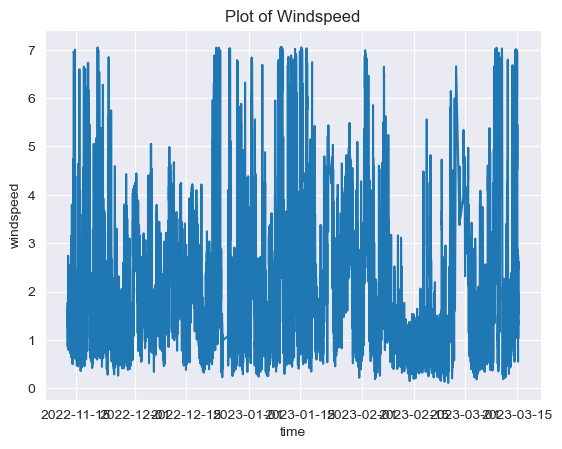

In [11]:
def skin_effect(dataframe, column_windspeed, column_watertemp, column_skintemp):
    deltaT = -0.130 -0.724 * (np.exp(-0.350 * dataframe[column_windspeed]))
    deltaT = deltaT.abs()  # convert negative values to positive

    output=pd.concat([pd.DataFrame({"skin_effect":deltaT}),dataframe],axis=1)
    return output

result = skin_effect(dataframe=LakeAegeri,column_watertemp="bulk_temp",column_windspeed="wind_speed", column_skintemp='skin_temp')
plt.plot(result["datetime"],result["wind_speed"])
plt.xlabel("time")
plt.ylabel("windspeed")
plt.title("Plot of Windspeed")


In [12]:
result.head()

,skin_effect,x,datetime,bulk_temp,skin_temp,air_temp,wind_speed,air_pressure,relative_humidity,solar_irradiance,meteo_timestamp,Quality
0,0.547953,1.668268e+09,2022-11-12 16:40:12.640,14.090047,11.993510,9.476764,1.569778,944.120417,91.256944,11.026389,1.668268e+09,0
1,0.585734,1.668269e+09,2022-11-12 17:00:12.751,13.749257,11.909722,9.414542,1.322522,944.079722,91.798611,1.611111,1.668269e+09,0
2,0.592745,1.668269e+09,2022-11-12 17:10:12.677,13.553642,11.750364,9.365691,1.278903,944.017112,92.003390,0.556743,1.668269e+09,0
3,0.519495,1.668270e+09,2022-11-12 17:20:12.667,13.699398,12.068005,9.159755,1.771260,944.040608,92.919684,0.000000,1.668270e+09,0
4,0.593882,1.668271e+09,2022-11-12 17:30:12.615,13.523770,11.913867,9.125819,1.271888,944.081806,93.006944,0.000000,1.668271e+09,0


In [13]:
#Test the model:
result["skin_effect_real"]=(result["bulk_temp"]-result["skin_temp"]).abs()

display(result["skin_effect"].describe())
display(result["skin_effect_real"].describe())

count    14991.000000
mean         0.508019
std          0.149151
min          0.191221
25%          0.393256
50%          0.526272
75%          0.629220
max          0.826178
Name: skin_effect, dtype: float64

count    14991.000000
mean         1.509172
std          1.213359
min          0.000077
25%          0.622952
50%          1.294452
75%          2.009072
max          9.495047
Name: skin_effect_real, dtype: float64

In [14]:
#plotting of the data

Text(0.5, 1.0, 'Skin-effect real vs Skin-effect model')

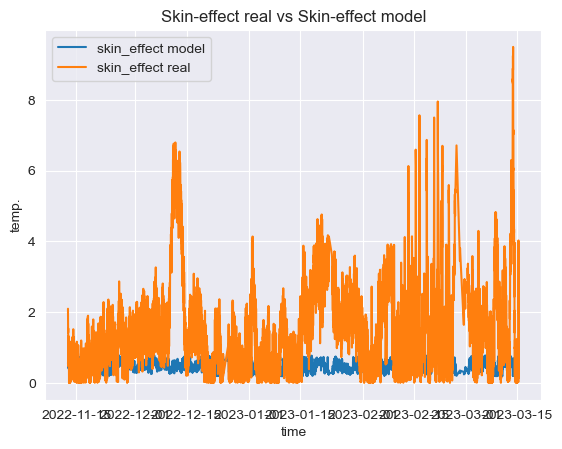

In [15]:
plt.plot(result["datetime"],result["skin_effect"],label ="skin_effect model")
plt.plot(result["datetime"],result["skin_effect_real"],label ="skin_effect real")
plt.xlabel("time")
plt.ylabel("temp.")
plt.legend()
plt.title("Skin-effect real vs Skin-effect model")

In [16]:
result["skin_effect_real_diff"]=(result["skin_effect"]-result["skin_effect_real"]).abs()
result["skin_effect_real_diff"].describe()

count    14991.000000
mean         1.116751
std          1.132627
min          0.000091
25%          0.314580
50%          0.775978
75%          1.518638
max          9.194426
Name: skin_effect_real_diff, dtype: float64

In [17]:
result['skin_effect'].describe

<bound method NDFrame.describe of 0        0.547953
1        0.585734
2        0.592745
3        0.519495
4        0.593882
           ...   
14986    0.586620
14987    0.536207
14988    0.452967
14989    0.419299
14990    0.436149
Name: skin_effect, Length: 14991, dtype: float64>

In [22]:
r2_score(result["skin_effect_real"], result["skin_effect"])

-0.7185092666534829